<a href="https://colab.research.google.com/github/Jorge2018/DataScience2022-2/blob/main/Script_agrupamientoKMedias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Importa datos

In [2]:
wine = pd.read_csv('https://s3.us-east-1.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/1613254703__modified_wine.csv')
df = wine[['malic_acid', 'flavanoids']]
df.head()


,malic_acid,flavanoids
0,1.71,3.06
1,1.78,2.76
2,2.36,3.24
3,1.95,3.49
4,1.76,3.39


# Instancia scaler y aplica escala en df

In [3]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(df)



# Visualizacion de los datos

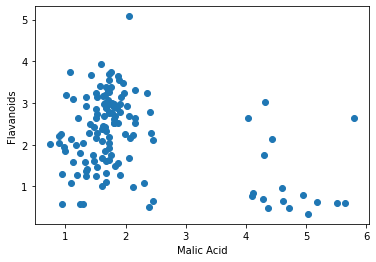

In [4]:
# Visualize data
plt.scatter(df['malic_acid'], df['flavanoids'])
plt.xlabel('Malic Acid')
plt.ylabel('Flavanoids');


# Creacion de agrupaciones basandose en el grafo anterior

In [5]:
# Instantiate KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)



KMeans(n_clusters=2)

# Visualizacion de agrupaciones recien creadas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


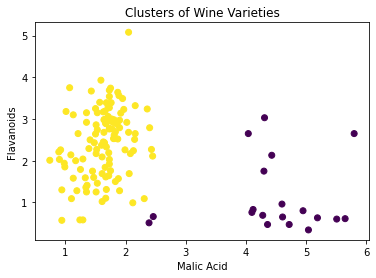

In [6]:
# Save the cluster labels to the dataframe 
df['cluster'] = kmeans.labels_
# Visualize the clusters
plt.scatter(df['malic_acid'], df['flavanoids'], c = df['cluster'])
plt.xlabel('Malic Acid')
plt.ylabel('Flavanoids')
plt.title('Clusters of Wine Varieties');


# Ejemplo Clustering metrics

In [9]:
from sklearn.metrics import silhouette_score
df=df[['malic_acid','flavanoids']]
df.head()


,malic_acid,flavanoids
0,1.71,3.06
1,1.78,2.76
2,2.36,3.24
3,1.95,3.49
4,1.76,3.39


In [10]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(df)


# Metodo del codo (elbow method)

Se puede apreciar el "codo", en el punto (3,60) aprox de los ejes x,y


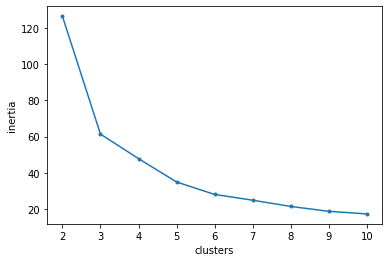

In [13]:
#Cracion de lista de inercias
inertias = []
# Ciclo for entre 2 y 10, va agregando (append) valores a la lista de inercias
for k in range(2,11):  
    kmeans = KMeans(n_clusters=k)  
    kmeans.fit(scaled_df)  
    inertias.append(kmeans.inertia_)
#Visualizacion de registros
plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')
print('Se puede apreciar el "codo", en el punto (3,60) aprox de los ejes x,y')


*vemos que el gráfico comienza para nivelarse en 3 clústeres.  Esto se parece a la curva de un brazo, por lo que se llama "codo". Por lo tanto, el 3 sería un candidato para un buen número de clústeres*

# Puntuacion de silueta

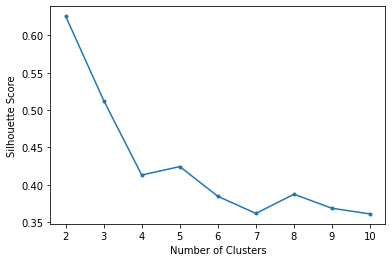

In [14]:
#Cracion de lista de silueta
silhouette_scores = []
# Ciclo for entre 2 y 10, va agregando (append) valores a la lista de silueta
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');



*De acuerdo con el trazado anterior, ¿cuál es el mejor número de clústeres para estos datos? (¡Recuerden que entre más sean altas las puntuaciones de silueta, mejor!) Podemos ver del trazado anterior que 2 sería el mejor número de clústeres para nuestros datos debido a que tiene la puntuación de silueta más alta.*

In [15]:
# Ajuste el modelo kmeans con 2 cluster y muestra la puntuación de la silueta
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)



0.6256358724826118

*Para este ejemplo, la puntuación de silueta nos da una diferente sugerencia para el agrupamiento que el trazado de codo de inercias.  Recuerden, no existe una manera precisa de determinar el mejor número de clústeres.  Visualicemos los clústeres 2 y 3 para ver si podemos determinar el mejor clúster visualmente.*

In [17]:
# Se adapta a 2 modelos de KMeans diferentes, uno con 2 cluster y otro con 3 cluster
kmeans2 = KMeans(n_clusters = 2)
kmeans3 = KMeans(n_clusters = 3)
kmeans2.fit(scaled_df)
kmeans3.fit(scaled_df)

KMeans(n_clusters=3)

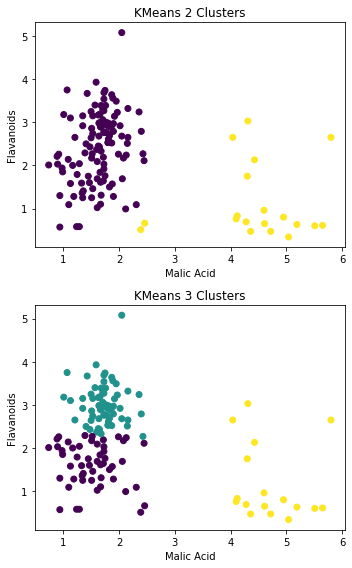

In [18]:
# Guarde las etiquetas del clúster en df
df['cluster2'] = kmeans2.labels_
df['cluster3'] = kmeans3.labels_
# Visualizacion de los clusters
fig, axes = plt.subplots(2,1, figsize=(5,8))
axes[0].scatter(df['malic_acid'], df['flavanoids'], c = df['cluster2'])
axes[0].set_xlabel('Malic Acid')
axes[0].set_ylabel('Flavanoids')
axes[0].set_title('KMeans 2 Clusters')
axes[1].scatter(df['malic_acid'], df['flavanoids'], c = df['cluster3'])
axes[1].set_xlabel('Malic Acid')
axes[1].set_ylabel('Flavanoids')
axes[1].set_title('KMeans 3 Clusters')
plt.tight_layout();

